# Decision Tree를 이용하여 WINE의 질 분류

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

## data불러오기 

In [2]:
original_data = pd.read_csv('winequality-red.csv',engine='python')
original_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## label의 값 분포 확인 

In [3]:
original_data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

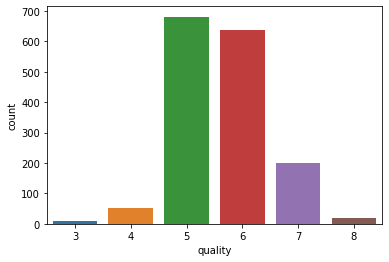

In [4]:
sns.countplot(original_data['quality'])

* 데이터 불균형 존재

In [5]:
original_data['quality'] = original_data['quality'].apply(lambda x: '1' if x>=6 else '0')

In [6]:
original_data['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

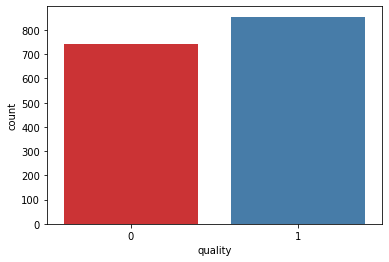

In [7]:
sns.countplot(x=original_data['quality'],palette='Set1')

In [8]:
y = original_data['quality']
x = original_data.drop('quality',axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [10]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
438,10.4,0.41,0.55,3.2,0.076,22.0,54.0,0.99960,3.15,0.89,9.9
547,10.6,0.31,0.49,2.5,0.067,6.0,21.0,0.99870,3.26,0.86,10.7
1190,9.1,0.40,0.57,4.6,0.080,6.0,20.0,0.99652,3.28,0.57,12.5
356,11.5,0.41,0.52,3.0,0.080,29.0,55.0,1.00010,3.26,0.88,11.0
1484,6.8,0.91,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.9
...,...,...,...,...,...,...,...,...,...,...,...
1528,7.9,0.29,0.49,2.2,0.096,21.0,59.0,0.99714,3.31,0.67,10.1
952,8.2,0.31,0.40,2.2,0.058,6.0,10.0,0.99536,3.31,0.68,11.2
330,10.2,0.36,0.64,2.9,0.122,10.0,41.0,0.99800,3.23,0.66,12.5
1316,5.4,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5


In [11]:
y_train

438     1
547     1
1190    1
356     0
1484    0
       ..
1528    1
952     1
330     1
1316    1
66      0
Name: quality, Length: 1279, dtype: object

In [51]:
model = DecisionTreeClassifier(min_samples_split=10,random_state=99)

In [52]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [53]:
mean_accuracy_for_train = model.score(X_train, y_train)
print(mean_accuracy_for_train)

0.9405785770132916


In [54]:
mean_accuracy_for_test = model.score(X_test, y_test)
print(mean_accuracy_for_test)

0.71875


## 그래프를 통해 Decision Tree 분류 과정 알아보기

In [55]:
from graphviz import Source
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from IPython.display import Image

In [56]:
information_labels = original_data['quality'].value_counts()

In [59]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [60]:
target_name = np.array(['0','1'])

In [61]:
graph = tree.export_graphviz(model,out_file= None,feature_names=features,class_names=target_name,impurity=False,filled=True)

In [62]:
dt_graph = pydotplus.graph_from_dot_data(graph)

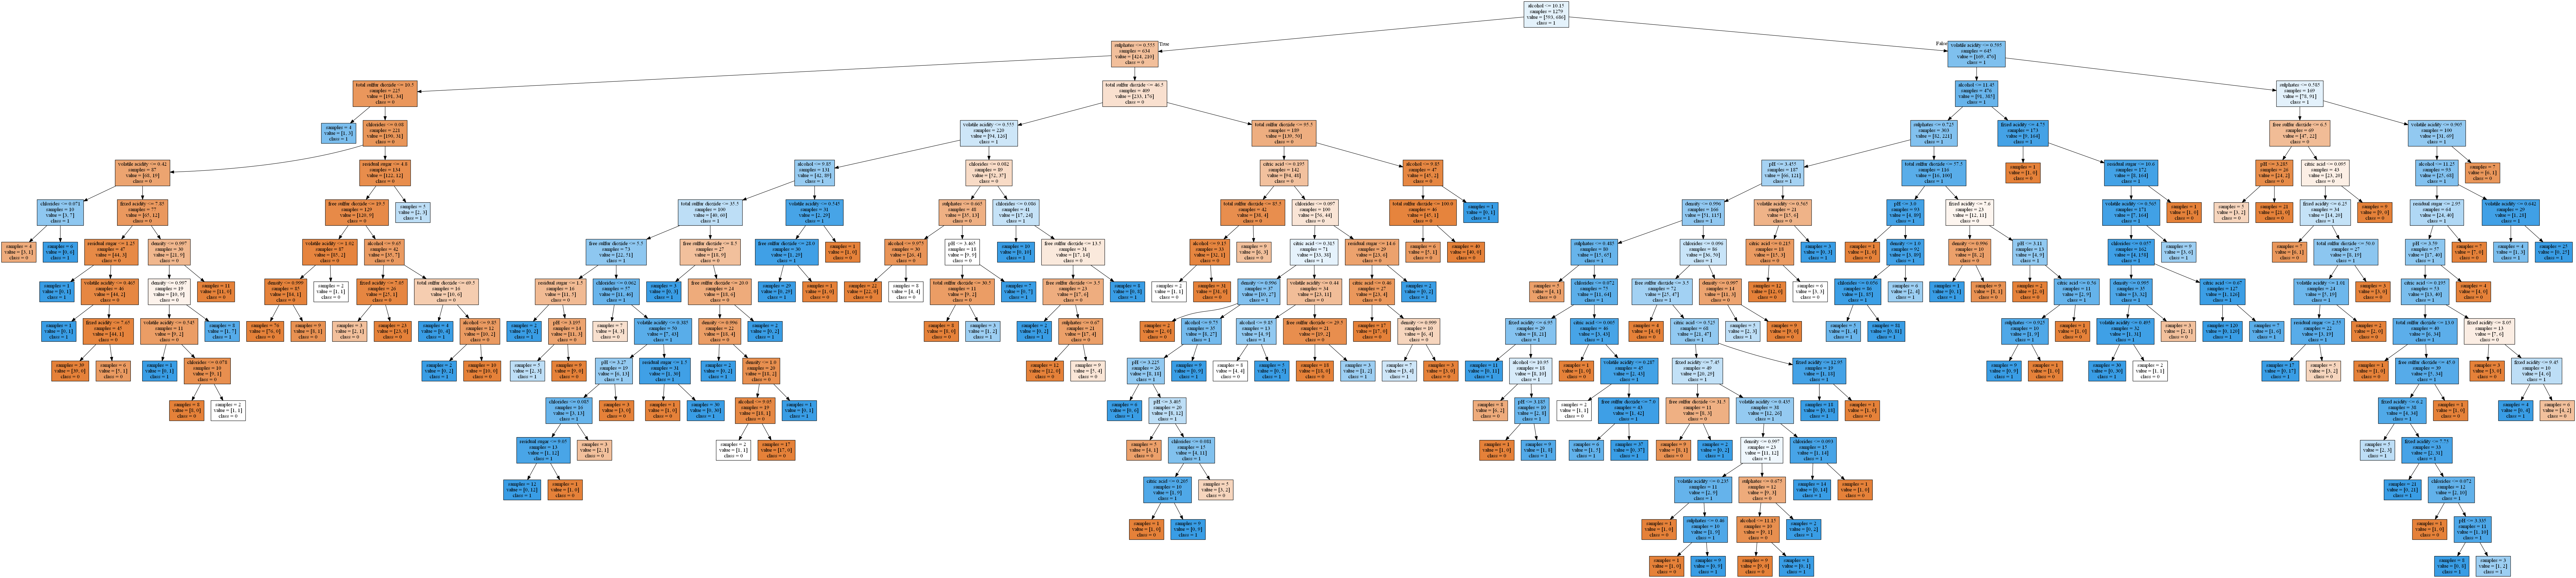

In [63]:
Image(dt_graph.create_png())

## feature의 중요도 살피기

In [67]:
print(features)
print(model.feature_importances_)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
[0.04395823 0.11844429 0.06235234 0.0443801  0.06396533 0.07198935
 0.10146951 0.0581279  0.06077253 0.10375072 0.2707897 ]


* 중요도가 낮은 feature를 제외하면 좀 더 높은 성능을 기대할 수 있다!